# Nigel session : Autonomous vehicle
level 1 :
level 2 :
level 3 :
level 4 :
level 5 :

# Rob session : Guassian mixture model （GMM）

聚类：带有概率

#  1. Build GMM model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mixed_population = pd.read_csv("Mixed population Data.csv")
mixed_population

,The_Data
0,113.56
1,61.05
2,37.02
3,108.99
4,110.36
...,...
977,117.43
978,64.23
979,107.29
980,117.62


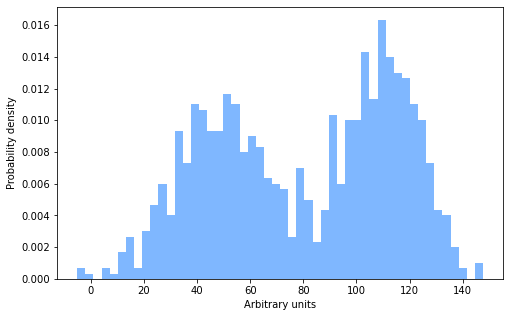

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[8,5])
ax.hist(mixed_population, bins = 50, density = True, alpha = 0.5, color = "#0070FF")

ax.set_ylabel("Probability density")
ax.set_xlabel("Arbitrary units")

plt.show()

## 1.1 Generate some data for first population 

In [12]:
sample_mean = -0.5
sample_sd = 0.7
number_of_samples = 2000

In [13]:
# generate 正态分布
samples = np.random.normal(sample_mean,sample_sd, number_of_samples)

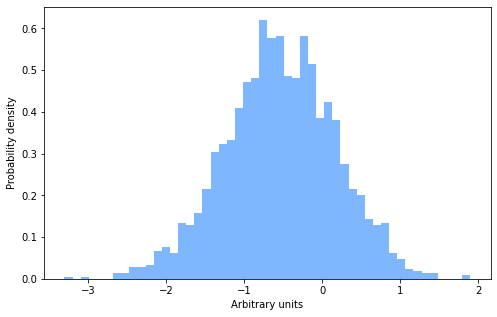

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[8,5])
ax.hist(samples, bins = 50, density = True, alpha = 0.5, color = "#0070FF")

ax.set_ylabel("Probability density")
ax.set_xlabel("Arbitrary units")

plt.show()

## Add a second population 

In [15]:
samples2 = np.random.normal(1,0.3,2000)

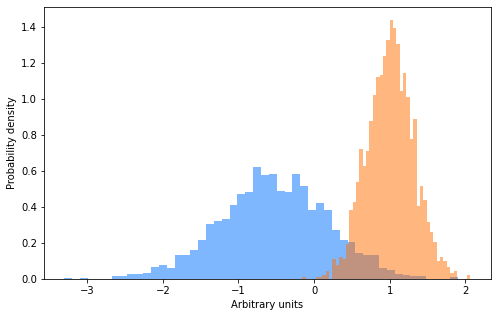

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[8,5])
ax.hist(samples, bins = 50, density = True, alpha = 0.5, color = "#0070FF")
ax.hist(samples2, bins = 50, density = True, alpha = 0.5, color = "#ff7000")

ax.set_ylabel("Probability density")
ax.set_xlabel("Arbitrary units")

plt.show()

In [17]:
combined_samples = np.append(samples, samples2)

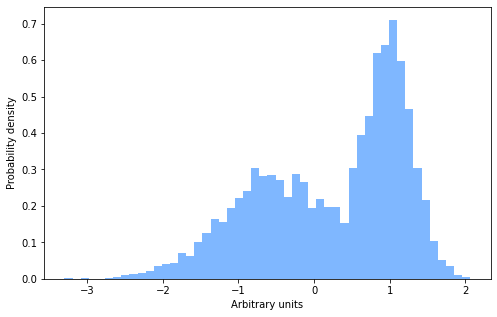

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[8,5])
ax.hist(combined_samples, bins = 50, density = True, alpha = 0.5, color = "#0070FF")

ax.set_ylabel("Probability density")
ax.set_xlabel("Arbitrary units")

plt.show()

# 2. FULL algorithm for GMM

In [21]:
# 给定均值和标准差的正态分布，给一个数据求其概率
def norm_dist(data, mean: float, standardDeviation: float):
    variance = standardDeviation * standardDeviation
    s1 = 1/(np.sqrt(2*np.pi*variance))
    s2 = np.exp(-(np.square(data-mean)/(2*variance)))
    return s1 * s2 

In [22]:
norm_dist(4,7,2)

0.06475879783294587

In [23]:
X = np.array(mixed_population)
print(X.shape)
mixed_population

(982, 1)


,The_Data
0,113.56
1,61.05
2,37.02
3,108.99
4,110.36
...,...
977,117.43
978,64.23
979,107.29
980,117.62


In [27]:
X = mixed_population.to_numpy().flatten()


In [28]:
k = 2
weights = np.ones((k)) / k
weights

array([0.5, 0.5])

In [29]:
means = np.array([10,30])
variances = np.array([1,1])

In [30]:
eps = 1e-8

In [31]:
iterationCount = 0

In [32]:
# step 1
iterationCount = iterationCount + 1
print("Iteration: ", iterationCount)

likelihood = []

for j in range(k):
    likelihood.append(norm_dist(X, means[j], np.sqrt(variances[j])))
likelihood = np.array(likelihood)

b = []

for j in range(k):
    print("Population: ", j+1)
    b.append((likelihood[j] * weights[j]) / 
             (np.sum([likelihood[i] * weights[i] for i in range(k)], axis = 0)+eps))
    
    means[j] = np.sum(b[j]*X) / (np.sum(b[j]+eps))
    print(" Mean : " means[j])
    variances[j] = np.sum(b[j] * np.square(X - means[j])) / (np.sum(b[j]+eps))
    print(" Standard deviation:", np.sqrt(variances[j]))
    
for j in range(k):
    weights[j] = np.mean(b[j])

print("weights[i] : ", [weights[i] for i in range[k])
                        

SyntaxError: invalid syntax (Temp/ipykernel_13852/1255402512.py, line 19)